# **Regresores para hallar %CCR**

### SVR y PLS

Sin iteraciones

## **Importe Librerias**


In [1]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 
import openpyxl
import sklearn
from sklearn.preprocessing import Normalizer # Normalizacion de datos


#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression



#Librerias Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


#Graficas
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

In [2]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiendo de Datos**

In [3]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe

print(dt_Supp_spect.shape)
print("#"*62)
# print(dt_Supp_spect.dtypes)
print("#"*62)
dt_Supp_spect.head() #print dt frame

(59692, 41)
##############################################################
##############################################################


,Molecules\Samples,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dt_Supp_spect = dt_Supp_spect.drop(['Molecules\Samples'], axis=1)
dt_Supp_spect.head()

,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,15.985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,28.735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,41.754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,30.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,40.590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumiendo que dt_Supp_spect tiene 38 columnas, con las primeras 19 para crudos y las siguientes 19 para fondos
# Separar el dataset en crudos y fondos
dt_Supp_spect_crudos = dt_Supp_spect.iloc[:, :21]
dt_Supp_spect_fondos = dt_Supp_spect.iloc[:, 21:40]

In [6]:
from sklearn.preprocessing import Normalizer

# Crear instancias del normalizador
normalizer_crudos = Normalizer()
normalizer_fondos = Normalizer()

# Normalizar cada subconjunto de datos
dt_Supp_spect_crudos_normalized = normalizer_crudos.fit_transform(dt_Supp_spect_crudos)
dt_Supp_spect_fondos_normalized = normalizer_fondos.fit_transform(dt_Supp_spect_fondos)

# Convertir a DataFrame
dt_Supp_spect_crudos_normalized = pd.DataFrame(dt_Supp_spect_crudos_normalized, columns=dt_Supp_spect_crudos.columns)
dt_Supp_spect_fondos_normalized = pd.DataFrame(dt_Supp_spect_fondos_normalized, columns=dt_Supp_spect_fondos.columns)


In [7]:
dt_Supp_spect = pd.concat([dt_Supp_spect_crudos_normalized, dt_Supp_spect_fondos_normalized], axis=1)
print(dt_Supp_spect.shape)
dt_Supp_spect.head()

(59692, 40)


,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,0.228485,0.407509,0.158843,0.351245,0.033447,0.031916,0.037018,0.028628,0.253031,0.226544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.288684,0.341384,0.179985,0.353362,0.102791,0.067862,0.095953,0.105524,0.342496,0.275583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.230525,0.324244,0.182672,0.333561,0.153943,0.095976,0.132256,0.168469,0.301443,0.250009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.166982,0.229657,0.143252,0.218747,0.231096,0.190786,0.209285,0.245211,0.190141,0.163920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.261907,0.312893,0.202207,0.290228,0.188807,0.120988,0.125432,0.209229,0.315461,0.203173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# #Dt_Supp_spect - Transpuesta valuesTranspose Valt
# valt=dt_Supp_spect.transpose() 
# print(type(valt))
# print(valt.shape)
# valt = valt.loc[:, (valt != 0).any(axis=0)]
# dt_Supp_spect = valt.transpose()
# print(dt_Supp_spect.shape)
# print("Diff", valt.shape[1])
# print("Diff", (59692-dt_Supp_spect.shape[0]))



# dt_Supp_spect.head()


In [9]:
# # Una manera de normalizar ... 
# #suma de la columna de los valores Transpuestos
# valSum=valt.sum(axis=1)
# valorSumados=valSum.values
# print(valorSumados)
# print(valorSumados.shape)


In [10]:
# suma=valorSumados.reshape(40,1) #Reshape
# print(suma.shape) 
# valtn=valt/suma 

# #Dt_Supp_spect - Transpuestos/SumaColumnas
# valtn.head()

In [11]:
valtn=dt_Supp_spect.transpose()
print(valtn.shape)
valtn.head()


(40, 59692)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,0.228485,0.288684,0.230525,0.166982,0.261907,0.143087,0.239547,0.210565,0.164406,0.198990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR2,0.407509,0.341384,0.324244,0.229657,0.312893,0.225219,0.299156,0.323037,0.222037,0.264886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR3,0.158843,0.179985,0.182672,0.143252,0.202207,0.091430,0.188030,0.135426,0.154087,0.228720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR4,0.351245,0.353362,0.333561,0.218747,0.290228,0.164312,0.302438,0.265793,0.227296,0.243436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR5,0.033447,0.102791,0.153943,0.231096,0.188807,0.179648,0.207757,0.116638,0.279470,0.245515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dt_Supp_spect.head()

,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,0.228485,0.407509,0.158843,0.351245,0.033447,0.031916,0.037018,0.028628,0.253031,0.226544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.288684,0.341384,0.179985,0.353362,0.102791,0.067862,0.095953,0.105524,0.342496,0.275583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.230525,0.324244,0.182672,0.333561,0.153943,0.095976,0.132256,0.168469,0.301443,0.250009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.166982,0.229657,0.143252,0.218747,0.231096,0.190786,0.209285,0.245211,0.190141,0.163920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.261907,0.312893,0.202207,0.290228,0.188807,0.120988,0.125432,0.209229,0.315461,0.203173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
valtn = valtn.loc[:, (valtn != 0).any(axis=0)]
print(valtn.shape)
valtn.head()

(40, 55154)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,0.228485,0.288684,0.230525,0.166982,0.261907,0.143087,0.239547,0.210565,0.164406,0.198990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR2,0.407509,0.341384,0.324244,0.229657,0.312893,0.225219,0.299156,0.323037,0.222037,0.264886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR3,0.158843,0.179985,0.182672,0.143252,0.202207,0.091430,0.188030,0.135426,0.154087,0.228720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR4,0.351245,0.353362,0.333561,0.218747,0.290228,0.164312,0.302438,0.265793,0.227296,0.243436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR5,0.033447,0.102791,0.153943,0.231096,0.188807,0.179648,0.207757,0.116638,0.279470,0.245515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


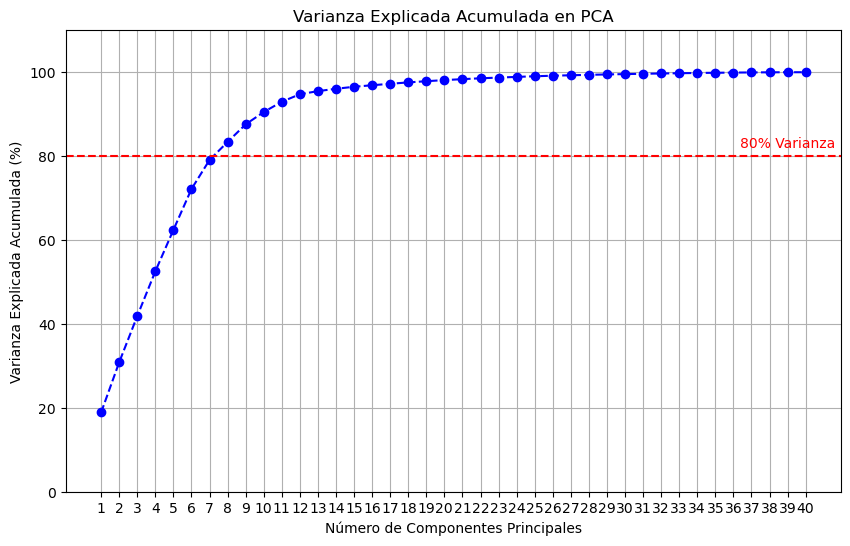

In [14]:
# Realizar PCA
pca = PCA()
pca.fit(valtn)

# Calcular la varianza explicada acumulada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada) * 100  # Multiplicar por 100 para obtener porcentajes

# Graficar % de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada en PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada (%)')  # Cambiado a porcentaje
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.ylim(0, 110)  # Escala de 0 a 100%
plt.grid()

# Línea para el umbral del 95% (ajustar este valor si es necesario)
umbral_varianza = 80  # Cambia este valor si deseas otro umbral
plt.axhline(y=umbral_varianza, color='r', linestyle='--')  
plt.text(len(varianza_acumulada) - 1, umbral_varianza + 2, f'{umbral_varianza}% Varianza', color='red', ha='center')
plt.savefig('Graficas/%VarianzaExplicadaAcumuladaEspectroscopiaMasas.png')
plt.show()

In [15]:
# valtn.fillna(0, inplace=True)

pca=PCA(n_components=8) #
pca.fit(valtn) # obtener los componentes principales
datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA
print(datos_pca.shape)
print(type(datos_pca))
print(datos_pca)

(40, 8)
<class 'numpy.ndarray'>
[[-3.76071372e+00 -3.62824591e+00 -2.70250915e+00 -6.90267740e-01
  -2.01848384e+00  5.27286778e-02 -1.56596023e+00 -2.37050790e+00]
 [-3.74302535e+00 -3.52152556e+00 -2.34679634e+00 -3.56200221e-01
  -2.14203470e+00  3.66456527e-02 -1.62925595e+00 -2.29466759e+00]
 [-3.93514881e+00 -3.66997560e+00 -2.67820461e+00 -7.00057372e-01
  -2.11270025e+00  1.70881564e-01 -1.74782322e+00 -2.20204870e+00]
 [-3.83110500e+00 -3.52296089e+00 -2.63039243e+00 -6.42040643e-01
  -2.16064831e+00  1.20420783e-02 -1.69725595e+00 -2.15074969e+00]
 [-3.29402398e+00 -2.50700572e+00 -3.13385534e+00 -6.45363187e-01
  -2.39849269e+00 -3.29499613e-01 -1.44196168e+00 -8.23918531e-01]
 [-3.81518328e+00 -3.49278007e+00 -2.36294593e+00 -5.82706520e-01
  -1.97024369e+00  2.61555756e-01 -1.67386967e+00 -2.12066108e+00]
 [-3.89057305e+00 -3.52609114e+00 -2.55817524e+00 -6.41110921e-01
  -2.17557959e+00  1.85938477e-01 -1.77010688e+00 -1.87072978e+00]
 [-3.65375209e+00 -3.23964425e+00 -2.

In [21]:
import pandas as pd

# Crear DataFrame de datos PCA
datos_pca_df = pd.DataFrame(datos_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7', 'PCA8'])

# Ahora puedes imprimirlo de manera similar
print(datos_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.760714 -3.628246 -2.702509 -0.690268 -2.018484  0.052729 -1.565960   
1 -3.743025 -3.521526 -2.346796 -0.356200 -2.142035  0.036646 -1.629256   
2 -3.935149 -3.669976 -2.678205 -0.700057 -2.112700  0.170882 -1.747823   
3 -3.831105 -3.522961 -2.630392 -0.642041 -2.160648  0.012042 -1.697256   
4 -3.294024 -2.507006 -3.133855 -0.645363 -2.398493 -0.329500 -1.441962   

       PCA8  
0 -2.370508  
1 -2.294668  
2 -2.202049  
3 -2.150750  
4 -0.823919  


In [22]:
#import target 40 muestras (masas)(Crudos y Fondos/Vacios)
#Dataframe Supplementary_CCR_properties
dt_Supp_Prop = pd.read_csv('Data/Supplementary_CCR_properties.csv',sep=",", decimal=",") #import dtframe
print('shape: ',dt_Supp_Prop.shape)
print('#'*85)
print(dt_Supp_Prop.dtypes)
print('#'*85)
dt_Supp_Prop.head() #print dt frame

shape:  (40, 2)
#####################################################################################
Samples       object
CCR (wt%)    float64
dtype: object
#####################################################################################


,Samples,CCR (wt%)
0,CR1,12.94
1,CR2,4.34
2,CR3,9.67
3,CR4,7.03
4,CR5,17.84


In [23]:
#Dataframe Supplementary_CCR_spectra transpose
dt_spec_Transpose = dt_Supp_spect.transpose()
print(dt_spec_Transpose.shape)
dt_spec_cut = dt_spec_Transpose.drop(dt_spec_Transpose.index[[0]])
print(dt_spec_cut.shape)
dt_spec_Transpose.head(41)

(40, 59692)
(39, 59692)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,0.228485,0.288684,0.230525,0.166982,0.261907,0.143087,0.239547,0.210565,0.164406,0.198990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR2,0.407509,0.341384,0.324244,0.229657,0.312893,0.225219,0.299156,0.323037,0.222037,0.264886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR3,0.158843,0.179985,0.182672,0.143252,0.202207,0.091430,0.188030,0.135426,0.154087,0.228720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR4,0.351245,0.353362,0.333561,0.218747,0.290228,0.164312,0.302438,0.265793,0.227296,0.243436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR5,0.033447,0.102791,0.153943,0.231096,0.188807,0.179648,0.207757,0.116638,0.279470,0.245515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR6,0.031916,0.067862,0.095976,0.190786,0.120988,0.282939,0.171209,0.216570,0.196082,0.174029,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
CR7,0.037018,0.095953,0.132256,0.209285,0.125432,0.262296,0.187975,0.194138,0.212884,0.166931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
CR8,0.028628,0.105524,0.168469,0.245211,0.209229,0.182565,0.196180,0.129138,0.259166,0.235144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR9,0.253031,0.342496,0.301443,0.190141,0.315461,0.176461,0.252944,0.257104,0.246041,0.252757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR10,0.226544,0.275583,0.250009,0.163920,0.203173,0.172421,0.197854,0.231829,0.180779,0.176766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Aplicacion Modelos ML**

In [40]:
#Definimos las moleculas como Features
dt_features= dt_spec_Transpose.to_numpy()  #Variables predictoras
#Definimos CCR% como Target
dt_target=dt_Supp_Prop['CCR (wt%)'].to_numpy()  #Variable Objetivo

dt_features = Normalizer().fit_transform(dt_features) #Normalizar datos

#partir conjunto de entrenamiento
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state = 42,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
# X_train, X_test, y_train, y_test= train_test_split(datos_pca, dt_target, train_size= 0.8,random_state = 42,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

print(type(datos_pca),X_train.shape)
print(type(dt_target),X_test.shape)
print(type(y_train),y_train.shape)
print(type(y_test),y_test.shape)

<class 'numpy.ndarray'> (32, 59692)
<class 'numpy.ndarray'> (8, 59692)
<class 'numpy.ndarray'> (32,)
<class 'numpy.ndarray'> (8,)


In [41]:
# Creación del modelo SVR Polinomico
# ==============================================================================

modeloSVR = SVR(C = 50, kernel = 'poly', degree=2)
modeloPLS = PLSRegression(n_components=2)

modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

PLSRegression()

In [42]:
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

print(prediccionesPLS.shape)
print("prediccionesSVR",prediccionesSVR)
print("prediccionesPLS",prediccionesPLS)
print(y_test.shape,y_test)

(8, 1)
prediccionesSVR [15.95180836 13.04444585 12.24760492 20.78545395 18.1723226   8.64274713
 21.20090668 20.60033724]
prediccionesPLS [[13.21332979]
 [12.13743445]
 [12.36683062]
 [19.59103333]
 [15.20656798]
 [11.67440285]
 [20.45789746]
 [18.41383654]]
(8,) [ 5.34  8.32  3.38 35.4  17.84  4.77 18.2  30.6 ]


In [43]:
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

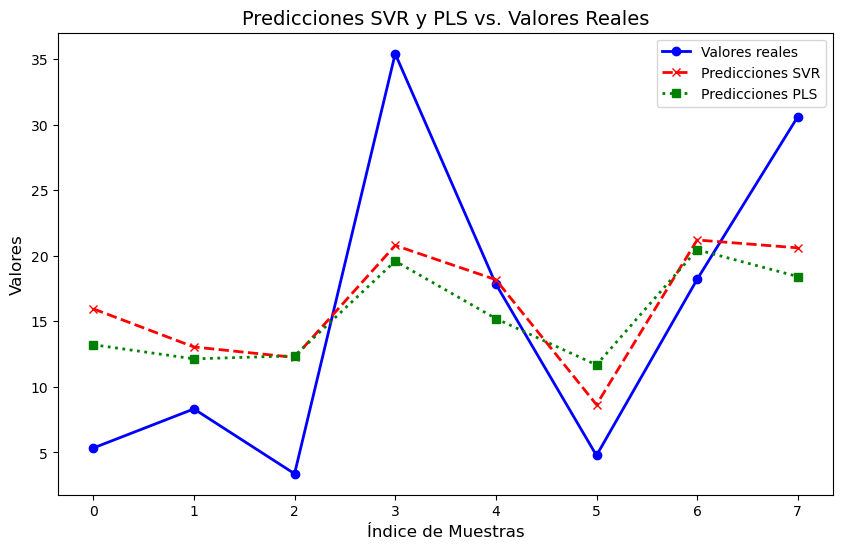

In [44]:
plt.figure(figsize=(10, 6))

# Gráfico de líneas para valores reales
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Valores reales', marker='o', linestyle='-', linewidth=2)

# Gráfico de líneas para predicciones SVR
plt.plot(np.arange(len(prediccionesSVR)), prediccionesSVR, color='red', label='Predicciones SVR', marker='x', linestyle='--', linewidth=2)

# Gráfico de líneas para predicciones PLS
plt.plot(np.arange(len(prediccionesPLS)), prediccionesPLS, color='green', label='Predicciones PLS', marker='s', linestyle=':', linewidth=2)

# Agregar etiquetas y leyenda
plt.title('Predicciones SVR y PLS vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Muestras', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='best')

plt.savefig("Graficas/CCRTrad_PrediccionesSVRPLS.png")


# Mostrar gráfico
plt.show()

## **Metricas**

In [45]:
#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado LPS= ', MSE_LPS)

# print( 'ErrorMedioCuadrado SVR= ',modeloSVR.score(y_test,prediccionesPLS)) #Mean SquareError para regresiones

ErrorMedioCuadrado SVR=  68.90719290572363
ErrorMedioCuadrado LPS=  76.93188791239416


In [46]:
#Error mediano cuadrado - valor ideal 0
from sklearn.metrics import median_absolute_error
MAE_SVR = median_absolute_error(y_test, prediccionesSVR)
MAE_LPS = median_absolute_error(y_test, prediccionesPLS)

print('ErrorMedianoCuadrado SVR= ', MAE_SVR)
print('ErrorMedianoCuadrado LPS= ', MAE_LPS)

# print( 'ErrorMedioCuadrado SVR= ',modeloSVR.score(y_test,prediccionesPLS)) #Mean SquareError para regresiones

ErrorMedianoCuadrado SVR=  6.796025380877032
ErrorMedianoCuadrado LPS=  7.3888663236437155


In [47]:
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)


print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)



r2error SVR=  0.476780774397481
r2error PLS=  0.4158484605121797


In [48]:
print( 'r2error SVR= ',modeloSVR.score(X_test,y_test)) #Mean SquareError para regresiones
print( 'r2error PLS= ',modeloPLS.score(X_test,y_test)) #Mean SquareError para regresiones

r2error SVR=  0.476780774397481
r2error PLS=  0.4158484605121797


In [49]:
#Error medio absoluto 
from sklearn.metrics import mean_absolute_error
ErrorAbsSVR = np.sqrt(mean_absolute_error(prediccionesSVR, y_test))
ErrorAbsPLS = np.sqrt(mean_absolute_error(prediccionesPLS, y_test))

print('AbsSVR =',ErrorAbsSVR)
print('AbsPLS =',ErrorAbsPLS)

AbsSVR = 2.64631924406952
AbsPLS = 2.7492830276684725


## **Graficas**

In [50]:
#Grafico Resultados SVR

import matplotlib.pyplot as plt 
import seaborn as sns

y_pred=prediccionesPLS_train
y_pred_test=prediccionesPLS

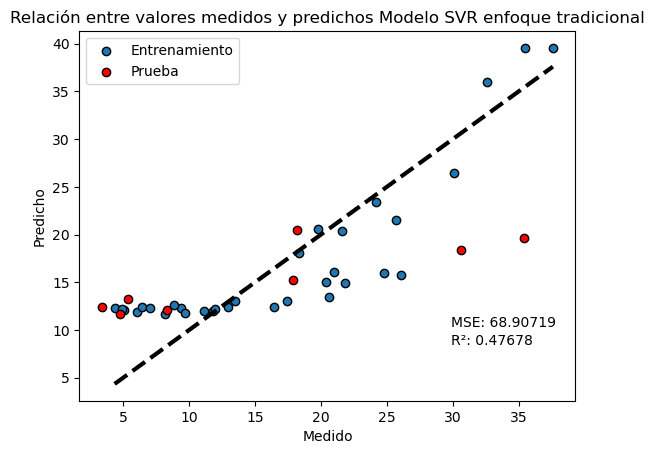

In [53]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)

# Añadiendo etiquetas para los textos de métricas
plt.text(0.75, 0.2, f"MSE: {MSE_SVR:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R²: {r2SVR:.5f}", transform=plt.gca().transAxes)

# Configurando etiquetas de los ejes
ax.set_xlabel('Medido')
ax.set_ylabel('Predicho')
ax.set_title('Relación entre valores medidos y predichos Modelo SVR enfoque tradicional')

# Añadiendo leyenda para identificar los colores
ax.legend(loc='upper left')

plt.show()

Text(0.5, 1.0, 'Histogram CCR/CRVR')

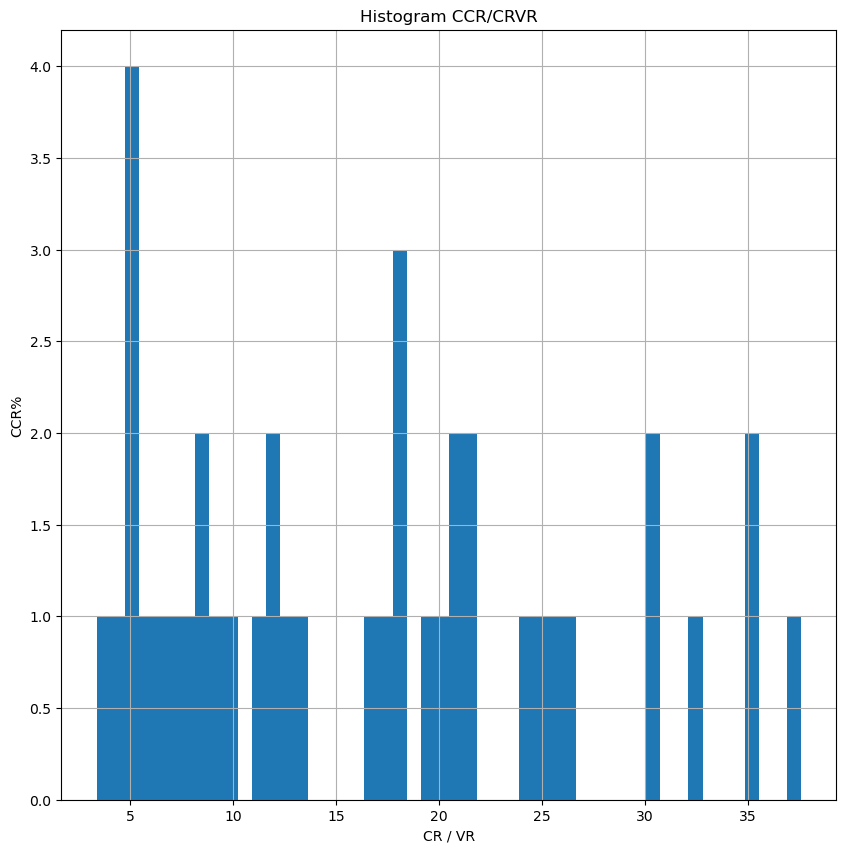

In [54]:
dt_Supp_Prop.hist(bins=50,   figsize=(10,10))
plt.xlabel('CR / VR')
plt.ylabel('CCR%')
plt.title('Histogram CCR/CRVR')


<AxesSubplot:>

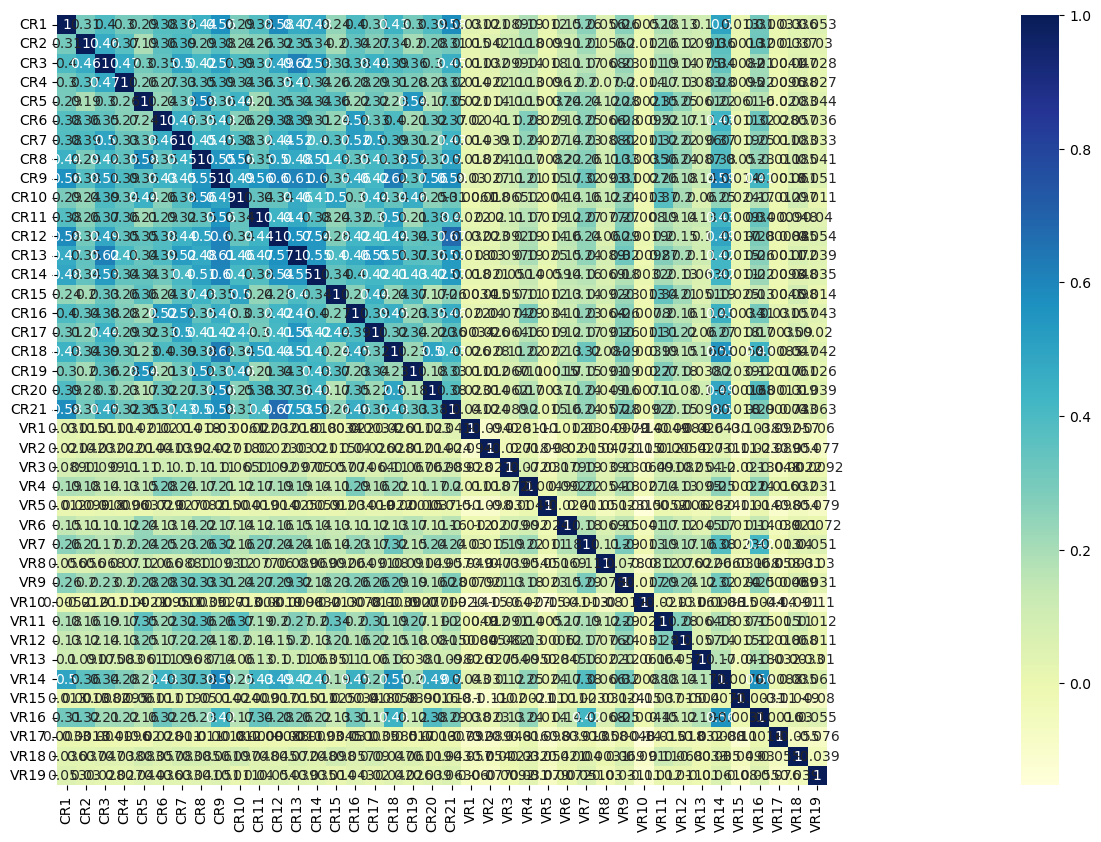

In [55]:
import seaborn as sns

plt.figure(figsize = (50,10))
sns.heatmap(dt_Supp_spect.corr(), square=True, annot=True, cmap="YlGnBu")

In [39]:
from joblib import dump
dump(modeloSVR, 'Regrecion%CCR_SVR.pkl')



['Regrecion%CCR_SVR.pkl']

## Enfoque iterativo

In [57]:
# Creación del modelo SVR
# ==============================================================================
#modelo = SVC(kernel='poly', probability=True, tol=1e-3) SVC al ser un modelo de clasificacion no funciona para este tipo de datos sin embargo es posible mezclarlo con PCA
modeloSVR = SVR(C = 50, kernel = 'poly', degree=2)
modeloPLS = PLSRegression(n_components=2)

In [58]:
bestErrorSVR=[]
bestErrorPLS=[]
bestR2SVR=[]
bestR2PLS=[]
for i in range (1,1024):
    X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
    #Fit models
    modeloSVR.fit(X_train, y_train)
    modeloPLS.fit(X_train, y_train)
    
    #Predict Models
    prediccionesSVR = modeloSVR.predict(X_test)
    prediccionesPLS = modeloPLS.predict(X_test)
    
    #Error medio Cuadrado - Valor ideal 0
    MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
    MSE_PLS = mean_squared_error(y_test, prediccionesPLS)
    
    #Agregar Valores a la matriz
    bestErrorSVR.append(MSE_SVR) # Valor ideal 0
    bestErrorPLS.append(MSE_PLS) #Valor ideal 0
    
    #Error R2 - Valor ideal 1
    r2SVR= r2_score(y_test, prediccionesSVR)#Valor ideal 1
    r2PLS= r2_score(y_test, prediccionesPLS)#Valor ideal 1
    
    #Agregar valores a la matriz
    bestR2SVR.append(r2SVR)
    bestR2PLS.append(r2PLS)

In [59]:
print(len(bestErrorSVR))

1023


In [60]:
print(np.argmin(bestErrorSVR))
print(np.min(bestErrorSVR))
print(bestErrorSVR[671])

111
5.19514651672076
10.358594459362145


In [61]:
print(np.argmax(bestR2SVR))
print(np.max(bestR2SVR))

671
0.7992029101479268


In [66]:
#partir conjunto de entrenamiento


X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state =np.argmax(bestR2SVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

#============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)
print("prediccionesSVR",prediccionesSVR)
print("prediccionesPLS",prediccionesPLS)
print("y_test",y_test.shape,y_test)

#=====================================================


#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado PLS= ', MSE_LPS)

#====================================================
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)

print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)

prediccionesSVR [ 6.86263454 12.52833644 20.87312239 19.37148722  7.56554588 20.12348408
 21.07294729 10.89210821]
prediccionesPLS [[11.03170288]
 [12.01205289]
 [19.35549462]
 [16.20433037]
 [10.6947728 ]
 [17.01907085]
 [19.27404111]
 [10.91761254]]
y_test (8,) [ 8.15 16.41 18.3  24.8   4.77 21.   25.7  11.14]
ErrorMedioCuadrado SVR=  10.358594459362145
ErrorMedioCuadrado PLS=  24.36736111533012
r2error SVR=  0.7992029101479268
r2error PLS=  0.5276487347266852


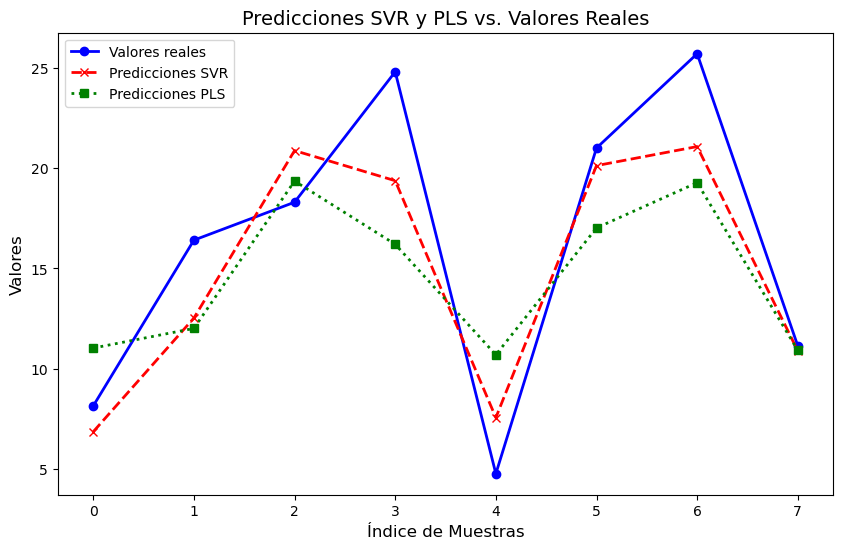

In [67]:
plt.figure(figsize=(10, 6))

# Gráfico de líneas para valores reales
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Valores reales', marker='o', linestyle='-', linewidth=2)

# Gráfico de líneas para predicciones SVR
plt.plot(np.arange(len(prediccionesSVR)), prediccionesSVR, color='red', label='Predicciones SVR', marker='x', linestyle='--', linewidth=2)

# Gráfico de líneas para predicciones PLS
plt.plot(np.arange(len(prediccionesPLS)), prediccionesPLS, color='green', label='Predicciones PLS', marker='s', linestyle=':', linewidth=2)

# Agregar etiquetas y leyenda
plt.title('Predicciones SVR y PLS vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Muestras', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='best')

plt.savefig("Graficas/CCRIter_PrediccionesSVRPLS.png")


# Mostrar gráfico
plt.show()

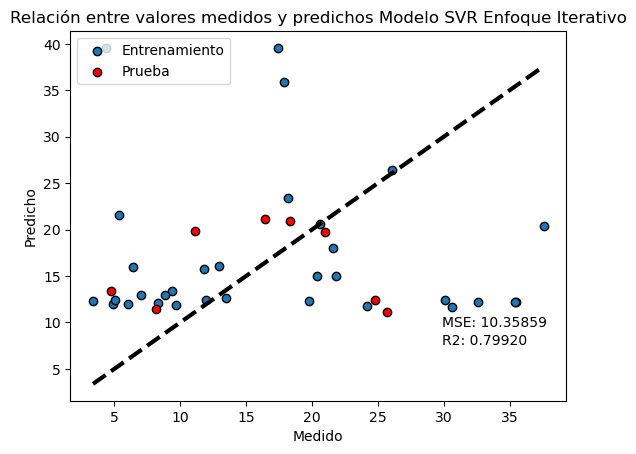

In [69]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {MSE_SVR:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2SVR:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Medido')
ax.set_ylabel('Predicho')
ax.set_title('Relación entre valores medidos y predichos Modelo SVR Enfoque Iterativo')

# Añadiendo leyenda para identificar los colores
ax.legend(loc='upper left')

plt.show()

In [63]:
#Grafico Resultados SVR

import matplotlib.pyplot as plt 
import seaborn as sns

y_pred=prediccionesPLS_train
y_pred_test=prediccionesPLS

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {MSE_PLS:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2PLS:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Medido')
ax.set_ylabel('Predicho')
ax.set_title('Relación entre valores medidos y predichos Modelo SVR Enfoque Iterativo')

# Añadiendo leyenda para identificar los colores
ax.legend(loc='upper left')

plt.show()